**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Train and Evaluate Model](#2-bullet)
3. [Predictions](#3-bullet)

## 1. [Libraries and settings](#1-bullet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1190 non-null   float64
 1   High         1190 non-null   float64
 2   Low          1190 non-null   float64
 3   Close        1190 non-null   float64
 4   Volume       1190 non-null   int64  
 5   TradingDate  1190 non-null   object 
 6   Code         1190 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 74.4+ KB


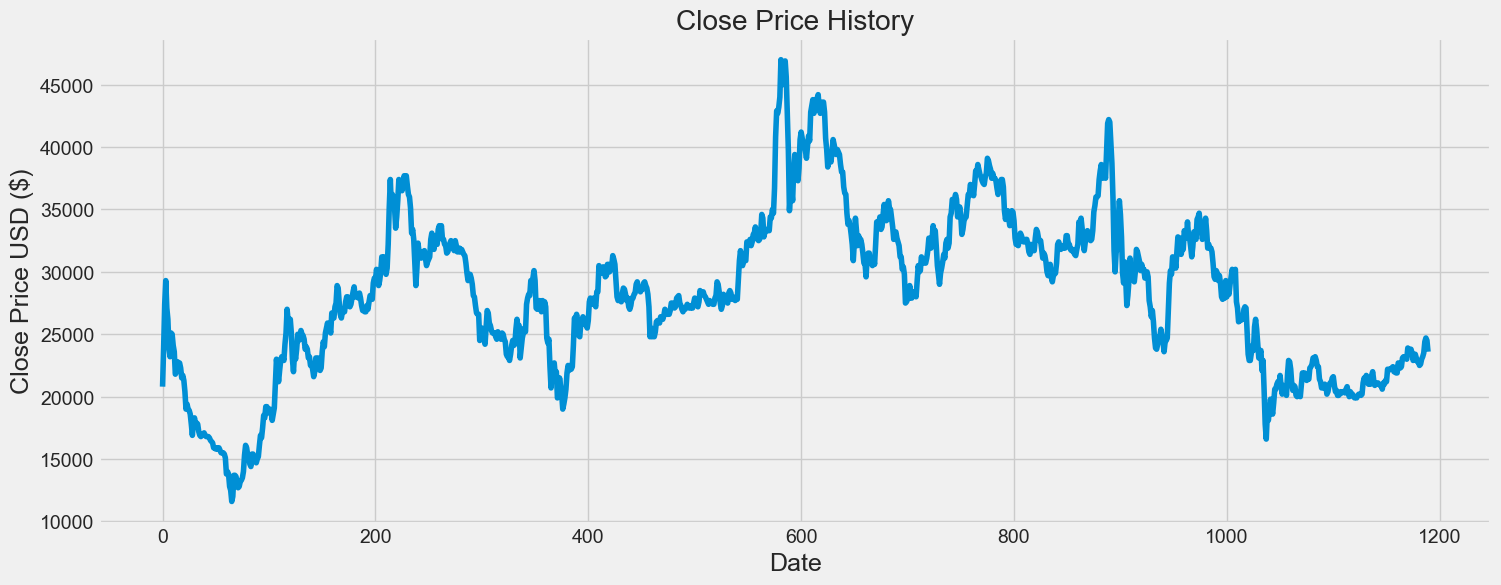

In [1]:
from DataPreprocessing import *

## 2. [Train and Evaluate Model](#2-bullet)

### Create dataset

In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
time_step = 30
x_for_train, y_for_train = create_dataset(scaled_data, time_step)

x_for_train = x_for_train.reshape(x_for_train.shape[0],x_for_train.shape[1])
y_for_train = y_for_train.reshape(y_for_train.shape[0],1)

In [4]:
training_size=int(len(dataset)*0.8)
test_size=len(dataset)-training_size
train_data,test_data=scaled_data[0:training_size],scaled_data[training_size:len(dataset)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (952, 1)
test_data:  (238, 1)


In [5]:
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

x_train =x_train.reshape(x_train.shape[0],x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test", y_test.shape)

x_train:  (921, 30)
y_train:  (921, 1)
x_test:  (207, 30)
y_test (207, 1)


### Building model

Using best hyperparameters after tuning to retrain model

In [6]:
# Create and train the SVR model
svr_model = SVR(C = 1, kernel = 'linear', gamma = 0.01)
svr_model.fit(x_train, y_train)

SVR(C=1, gamma=0.01, kernel='linear')

In [7]:
predictions = svr_model.predict(x_test)
predictions = predictions.reshape(-1,1)

predictions_train = svr_model.predict(x_train)
predictions_train = predictions_train.reshape(-1,1)

In [8]:
predictions = scaler.inverse_transform(predictions)
predictions_train = scaler.inverse_transform(predictions_train)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

In [9]:
column_names_pred = ['Close_predict']
df_predictions = pd.DataFrame(predictions, columns=column_names_pred)

column_names_test = ['Close_test']
df_test = pd.DataFrame(y_test, columns=column_names_test)

concatenated = np.concatenate([df_predictions, df_test], axis=1)
column_names_concat = ['Close_predict', 'Close_test']
df_concatenated = pd.DataFrame(concatenated, columns = column_names_concat)

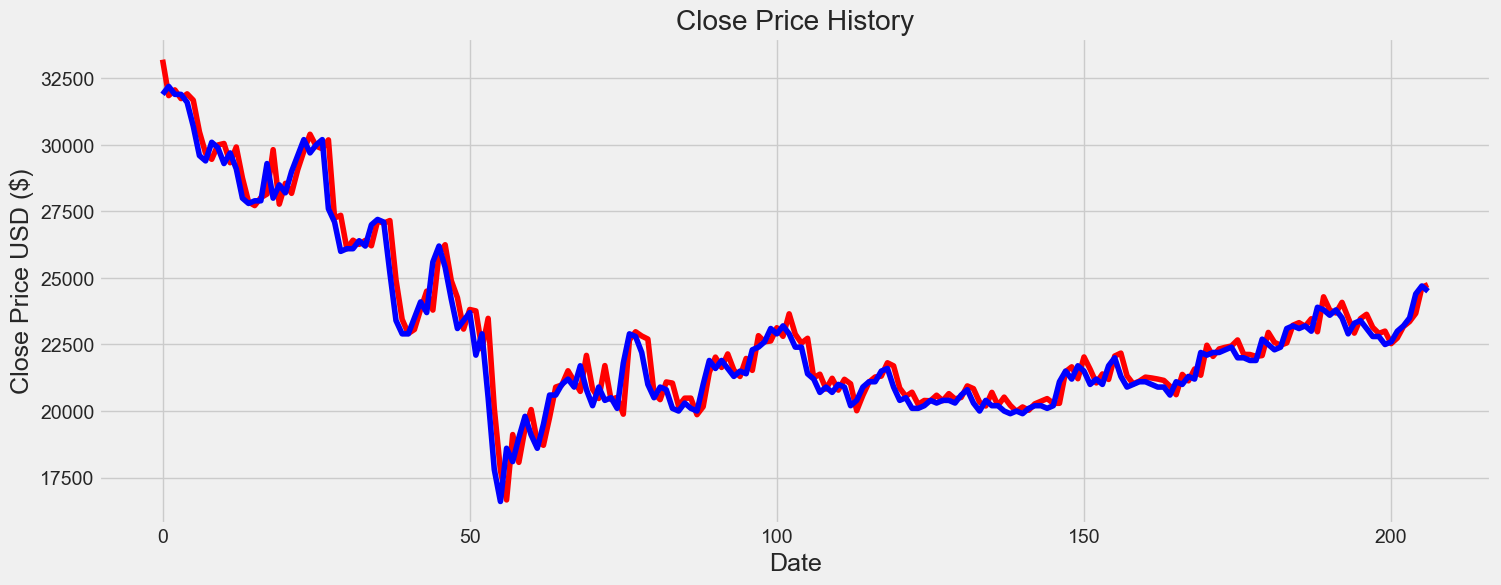

In [10]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_predictions['Close_predict'], color='red', label='Predicted Close Price')
plt.plot(df_test['Close_test'], color='blue', label='Actual Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Evaluate model

In [11]:
predictions = scaler.fit_transform(predictions)
predictions_train = scaler.fit_transform(predictions_train)
y_test = scaler.fit_transform(y_test)
y_train = scaler.fit_transform(y_train)

In [12]:
mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print("Train Mean Absolute Error:", mae_train)
print("Train Mean Squared Error:", rmse_train)
print("Train R-squared:", r2_train)

Train Mean Absolute Error: 0.09311721488378061
Train Mean Squared Error: 0.016258044526501175
Train R-squared: 0.9837419554734989


In [13]:
mae_test = mean_absolute_error(y_test, predictions)
rmse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print("Test Mean Absolute Error:", mae_test)
print("Test Mean Squared Error:", rmse_test)
print("Test R-squared:", r2_test)

Test Mean Absolute Error: 0.1440352596899682
Test Mean Squared Error: 0.042219072271484456
Test R-squared: 0.9577809277285155


## 3. [Predictions](#4-bullet)

In [14]:
predictions = scaler.inverse_transform(predictions)
predictions_train = scaler.inverse_transform(predictions_train)
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

In [15]:
last_60_days = np.array([y_test[i] for i in range(-1, -61, -1)])
next_days = []  
for i in range(60):
    input_data = x_test[i-60].reshape(-1,30)

    predicted_price = svr_model.predict(input_data)
    next_days.append(predicted_price)

#     
# pop_price = next_days.pop(0)
print("Predicted prices for the next days:")
    
for i, price in enumerate(next_days):
    price = scaler.inverse_transform(price.reshape(-1,1))
    print(f"Day {i+1}: {price}")
    
next_days = scaler.inverse_transform(np.array(next_days).reshape(-1,1))

Predicted prices for the next days:
Day 1: [[22755.03682773]]
Day 2: [[22937.75446628]]
Day 3: [[22494.20305794]]
Day 4: [[23305.40854673]]
Day 5: [[22846.47232459]]
Day 6: [[22336.27316706]]
Day 7: [[22671.73064687]]
Day 8: [[22467.39932112]]
Day 9: [[23340.06047514]]
Day 10: [[23450.59942664]]
Day 11: [[22603.18048772]]
Day 12: [[22303.63878541]]
Day 13: [[22400.63734927]]
Day 14: [[22551.83838057]]
Day 15: [[22521.04962688]]
Day 16: [[22480.55267676]]
Day 17: [[22430.00951173]]
Day 18: [[22211.11598017]]
Day 19: [[21897.50624051]]
Day 20: [[22653.52387177]]
Day 21: [[22414.40583999]]
Day 22: [[22854.89790236]]
Day 23: [[22623.72313208]]
Day 24: [[23743.81430381]]
Day 25: [[23328.39577587]]
Day 26: [[23605.41911388]]
Day 27: [[23667.22797299]]
Day 28: [[23714.08371434]]
Day 29: [[23941.05224131]]
Day 30: [[23402.79332609]]
Day 31: [[23397.38894029]]
Day 32: [[23327.84868319]]
Day 33: [[23359.18634046]]
Day 34: [[24223.22244462]]
Day 35: [[23852.08049957]]
Day 36: [[23744.73888304]]
D

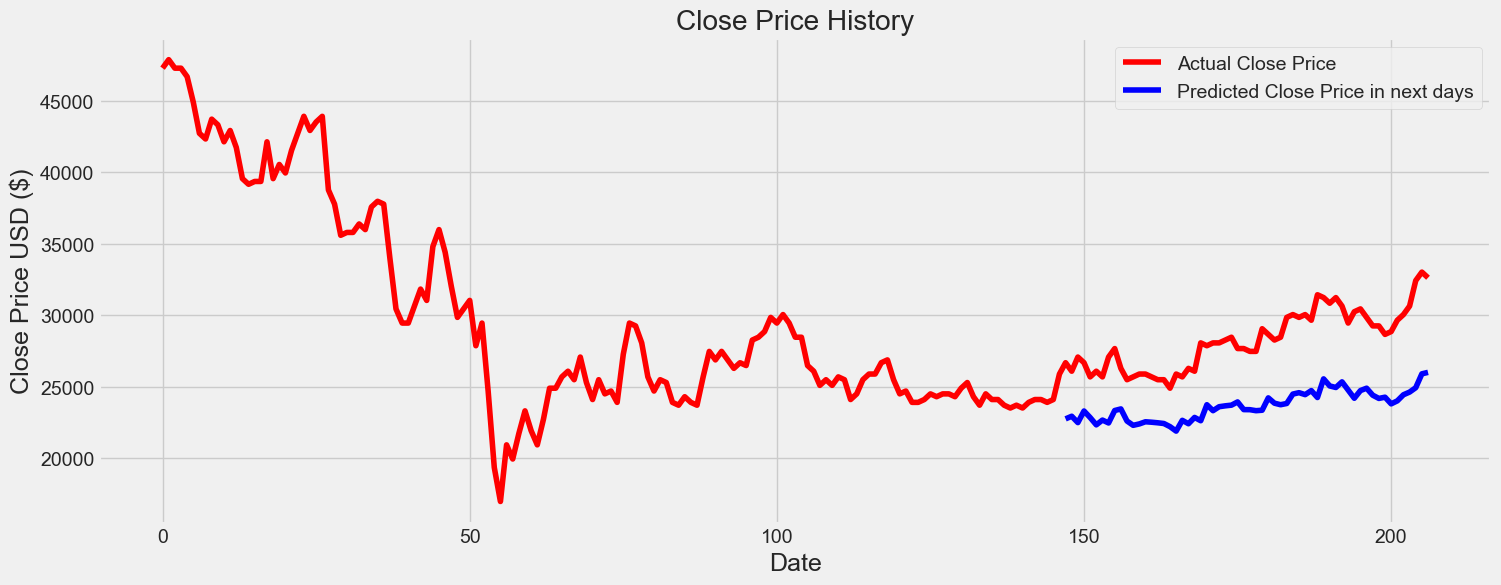

In [16]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(y_test[:], color='red', label='Actual Close Price')
plt.plot(range(len(y_test)-60, len(y_test)), next_days, color='blue', label='Predicted Close Price in next days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()